In [1]:
import numpy as np
from implementations_leo import *
#from Package import *
from proj1_helpers import *
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
y, x, ids = load_csv_data("train.csv", sub_sample=True)

#_, x_submission, ids_submission = load_csv_data("test.csv", sub_sample=False)

x[x == -999] = 0
#x_submission[x_submission == -999] = 0

In [ ]:
sum(phi_test.dot(w) > 0.5)

C:\Users\leope\Google Drive\EPFL\ML\ml-exercises-project1\Logistic regression\implementations_leo.py:11: RuntimeWarning: overflow encountered in exp
  loss += np.log(1 + np.exp(z)) - y_n * z
C:\Users\leope\Google Drive\EPFL\ML\ml-exercises-project1\Logistic regression\implementations_leo.py:21: RuntimeWarning: overflow encountered in exp
  expt = np.exp(t)
C:\Users\leope\Google Drive\EPFL\ML\ml-exercises-project1\Logistic regression\implementations_leo.py:23: RuntimeWarning: invalid value encountered in true_divide
  return expt / (1+expt)


0.342666666667


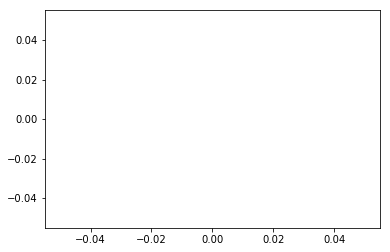

In [3]:
degree = 11
batch_size = 20

gamma = 0.001
w_initial = np.ones((x.shape[1]*degree +1,))*1e-3
max_iter = 100
ratio = 0.7
seed = 45

y_train, x_train, y_test, x_test = batch_data(y, x, int(ratio*len(y)), seed)
y_train = [0 if t == -1 else t for t in y_train]

phi_train = build_poly(x_train, degree, True)
phi_test = build_poly(x_test, degree, True)
loss = []
w = w_initial

for i in range(max_iter):
    
    w= GD_step(y_train, phi_train, w, gamma)
    loss.append(cost_function(y_train,phi_train,w))
    
print(sum(predict_y(phi_test, w) == y_test)/len(y_test))
plt.plot(range(max_iter), loss)

In [ ]:
phi_submission = build_poly(x_submission, degree) 

y_predicted = np.sign(phi_submission.dot(w))
create_csv_submission(ids_submission, y_predicted, "predictions1.csv")

In [ ]:
phi_submission.dot(w)

In [ ]:
np.mean(np.sign(np.dot(phi_test,w)))

In [ ]:
gammas